notebook_deniz_f_selection

1. Variance Thresholder

In [1]:
# X_train, X_test, y_train, y_test = train_test_split(data, target)
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(X_train)

# thresholder = VarianceThreshold(threshold=.5)
# data_var_th = thresholder.fit_transform(scaled_data)

Next looked at was SelectKBest and a similar alternative SelectFromModel - I model these out so that you can choose the correct k from a visual instead of using the sklearn model

notebook_deniz_feature_selection_last

Again looks at SelectKBest. Next is RFE which is very similar to SelectFromModel and again will be modeled manuallys so that visually we can decide on k and then again SelectFromModel.

notebook_sami_GBR

2. Gradient Boosting

This in addition to RandomForest will be used as the two models using in RFE and SelectFromModel analysis

In [2]:
# GBR = GradientBoostingRegressor(learning_rate= 0.1, n_estimators=1500, max_depth=2)
# GBR.fit(x_train, y_train)
# important_cols = x.columns[GBR.feature_importances_ > 0.0]
# values = GBR.feature_importances_[GBR.feature_importances_ > 0.0]

notebook_tova_features2

In [3]:
# feature_importances = sorted(zip(X_train.columns, rf.feature_importances_), reverse=True, key=lambda x: x[1])
# feature_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

# plt.figure(figsize=(18,6))
# plt.bar(feature_df.feature[:25], feature_df.importance[:25])
# plt.xticks(rotation=45)
# plt.title('Feature Importances')
# plt.tight_layout();

In [4]:
# train_scores = []
# f1_macro = []
# accuracy = []
# recall = []
# precision = []

# #Going to run the RFClassification on 
# for num_features in range(1,max_num_features):
#     features = list(feature_df.iloc[:num_features, 0].values) + ['SalePrice']
#     data_partial = data.loc[:, features]
#     X_train, X_test, y_train, y_test = get_binned_train_test_split(data_partial)
#     rf = RandomForestClassifier(**best_params)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
#     f1_macro.append(f1_score(y_test, y_pred, average='macro'))
#     accuracy.append(accuracy_score(y_test, y_pred))
#     recall.append(recall_score(y_test, y_pred, average='macro'))
#     precision.append(precision_score(y_test, y_pred, average='macro'))
#     train_scores.append(rf.score(X_train, y_train))

In [5]:
# plt.figure(figsize=(18,8))
# plt.plot(range(1, max_num_features), train_scores, label='train_score')
# plt.plot(range(1, max_num_features), f1_macro, label='f1_macro')
# plt.plot(range(1, max_num_features), accuracy, label='accuracy')
# plt.plot(range(1, max_num_features), recall, label='recall')
# plt.plot(range(1, max_num_features), precision, label='precision')
# plt.xticks(range(1, max_num_features))
# plt.legend()
# plt.xlabel('Number of features used')
# plt.ylabel('metric score %')

### Ok what now?
The tools we have are: Variance, GBR feature imporances, and RF feature importances.
We need to decide which to use and what the threshold is or what the number of features we want is.

We will do this seperately for Classification (SVM, RFC) and for Regression (lasso, ridge, and RF). 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [7]:
data = pd.read_csv('Numerical_train.csv')

In [8]:
data.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Alley', 'LotShape', 'LandContour', 'LandSlope', 'OverallQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=158)

In [9]:
target = data.SalePrice

In [10]:
data, data_test, target, target_test = train_test_split(data, target, test_size=.3)

In [11]:
target_log = np.log(target)

In [12]:
target_binned = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in target]

In [13]:
data = data.drop(['SalePrice', 'Unnamed: 0'], axis=1)

#### Variance

getting variance per feature

In [14]:
thresholder = VarianceThreshold()

In [15]:
thresholder.fit(data)

VarianceThreshold(threshold=0.0)

In [16]:
feature_importances_var = sorted(zip(data.columns, thresholder.variances_), reverse=True, key=lambda x: x[1])
feature_df_var = pd.DataFrame(feature_importances_var, columns=['feature', 'importance'])

In [17]:
feature_df_var.head()

,feature,importance
0,LotArea,8.379154e+07
1,MiscVal,3.419946e+05
2,GrLivArea,2.651652e+05
3,BsmtUnfSF,1.996915e+05
4,2ndFlrSF,1.951632e+05


In [18]:
feature_df_var.tail()

,feature,importance
151,Exterior2nd_Other,0.000978
152,SaleType_Con,0.000978
153,Neighborhood_Blueste,0.000000
154,Exterior1st_AsphShn,0.000000
155,Exterior2nd_AsphShn,0.000000


#### GBR

Now getting feature importances from GBR

First lets decide the best parameters

In [19]:
GBR = GradientBoostingRegressor()

In [20]:
param_grid = dict(learning_rate = [1, .1, .001, .0001],
                  n_estimators = [100, 500, 1000, 1500],
                  max_depth = [1, 2, 5, 10])

In [21]:
gridsearch_gbr = GridSearchCV(estimator = GBR, param_grid = param_grid, cv=3)

In [22]:
# gridsearch_gbr.fit(data, target_log)

In [23]:
# gridsearch_gbr.best_params_

In [24]:
best_params_gbr = {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}

Ok, now that we got the best parameters lets find feature importances.

In [25]:
GBR = GradientBoostingRegressor(**best_params_gbr)

In [26]:
GBR.fit(data, target_log)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
feature_importances_gbr = sorted(zip(data.columns, GBR.feature_importances_), reverse=True, key=lambda x: x[1])
feature_df_gbr = pd.DataFrame(feature_importances_gbr, columns=['feature', 'importance'])

In [28]:
feature_df_gbr.head()

,feature,importance
0,OverallQual,0.356186
1,GrLivArea,0.156574
2,GarageFinish,0.060938
3,GarageArea,0.056237
4,KitchenQual,0.053052


In [29]:
feature_df_gbr.tail()

,feature,importance
151,GarageType_BuiltIn,0.0
152,GarageType_Detchd,0.0
153,SaleType_ConLI,0.0
154,SaleType_ConLw,0.0
155,SaleCondition_Alloca,0.0


#### RF

Now getting feature importances from RF

First lets decide the best parameters

In [30]:
# from deniz's GridSearchCV
best_params_rf={'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 300}

In [31]:
RF = RandomForestRegressor()

In [32]:
param_grid = dict(max_depth = [45, 50, 55],
                  min_samples_leaf = [1, 2, 3],
                  min_samples_split = [3, 4, 5],
                  n_estimators = [250, 300, 350, 400, 450])

In [33]:
gridsearch_rf = GridSearchCV(estimator = RF, param_grid = param_grid, cv=3)

In [34]:
# gridsearch_rf.fit(data, target_log)

In [35]:
# gridsearch_rf.best_params_

In [36]:
best_params_rf = {'max_depth': 35,
                  'min_samples_leaf': 2,
                  'min_samples_split': 4,
                  'n_estimators': 250}

Ok, now that we got the best parameters lets find feature importances.

In [37]:
RF = RandomForestRegressor(**best_params_rf)

In [38]:
RF.fit(data, target_log)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=35,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
feature_importances_rf = sorted(zip(data.columns, RF.feature_importances_), reverse=True, key=lambda x: x[1])
feature_df_rf = pd.DataFrame(feature_importances_rf, columns=['feature', 'importance'])

In [40]:
feature_df_rf.head()

,feature,importance
0,OverallQual,0.544763
1,GrLivArea,0.106483
2,GarageArea,0.070624
3,1stFlrSF,0.043149
4,TotalBsmtSF,0.036083


In [41]:
feature_df_rf.tail()

,feature,importance
151,SaleType_Con,0.0
152,SaleType_ConLD,0.0
153,SaleType_ConLI,0.0
154,SaleType_Oth,0.0
155,SaleCondition_AdjLand,0.0


#### ok so now we have 3 lists of feature importances: variance, gbr, and rf

now lets compare then and see the overlap

In [42]:
features_compare = pd.DataFrame()

In [43]:
features_compare['var'] = feature_df_var.feature
features_compare['gbr'] = feature_df_gbr.feature
features_compare['rf'] = feature_df_rf.feature

In [44]:
features_compare.head(10)

,var,gbr,rf
0,LotArea,OverallQual,OverallQual
1,MiscVal,GrLivArea,GrLivArea
2,GrLivArea,GarageFinish,GarageArea
3,BsmtUnfSF,GarageArea,1stFlrSF
4,2ndFlrSF,KitchenQual,TotalBsmtSF
5,BsmtFinSF1,BsmtQual,BsmtFinSF1
6,TotalBsmtSF,1stFlrSF,YearBuilt
7,1stFlrSF,TotalBsmtSF,2ndFlrSF
8,GarageArea,BsmtFinSF1,LotArea
9,MasVnrArea,YearBuilt,OverallCond


In [45]:
features_compare_2 = features_compare.iloc[:,1:]

In [46]:
features_compare_2.head()

,gbr,rf
0,OverallQual,OverallQual
1,GrLivArea,GrLivArea
2,GarageFinish,GarageArea
3,GarageArea,1stFlrSF
4,KitchenQual,TotalBsmtSF


In [47]:
def top_n_features(n):
    return features_compare.iloc[:n, :].stack().value_counts()

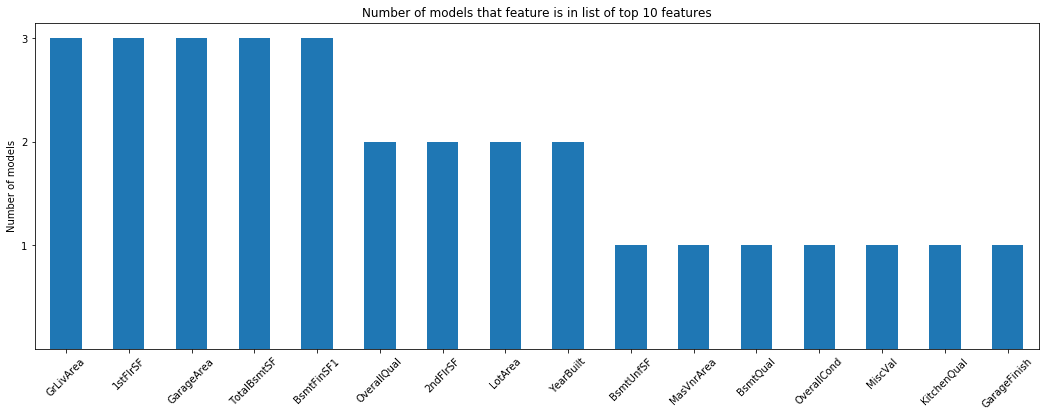

In [48]:
plt.figure(figsize=(18,6))
top_n_features(10)[:40].plot(kind='bar')
plt.title('Number of models that feature is in list of top 10 features')
plt.ylabel('Number of models')
plt.xticks(rotation=45);
plt.yticks([1,2,3]);

You can see from here the features that all, two, and at least one model thinks are the top 20 in importance

### Now for each of the models we will do some feature selection and then compare the best of each models

#### Lasso

In [49]:
max_num_features = 51

In [50]:
lasso_train_scores = pd.DataFrame()
lasso_test_scores = pd.DataFrame()

In [51]:
for name, feature_df in zip(['var', 'gbr', 'rf'], [feature_df_var, feature_df_gbr, feature_df_rf]):
    lasso_r_squared_train = []
    lasso_r_squared_test = []
    
    for num_features in range(1,max_num_features):
        features = list(feature_df.iloc[:num_features, 0].values)
        data_partial = data.loc[:, features]
        
        pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('estimator', Lasso(alpha=.0005))])
        scores = cross_validate(pipeline_lasso, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)
        
        lasso_r_squared_train.append(scores['train_score'].mean())
        lasso_r_squared_test.append(scores['test_score'].mean())
    
    lasso_train_scores[name] = lasso_r_squared_train
    lasso_test_scores[name] = lasso_r_squared_test

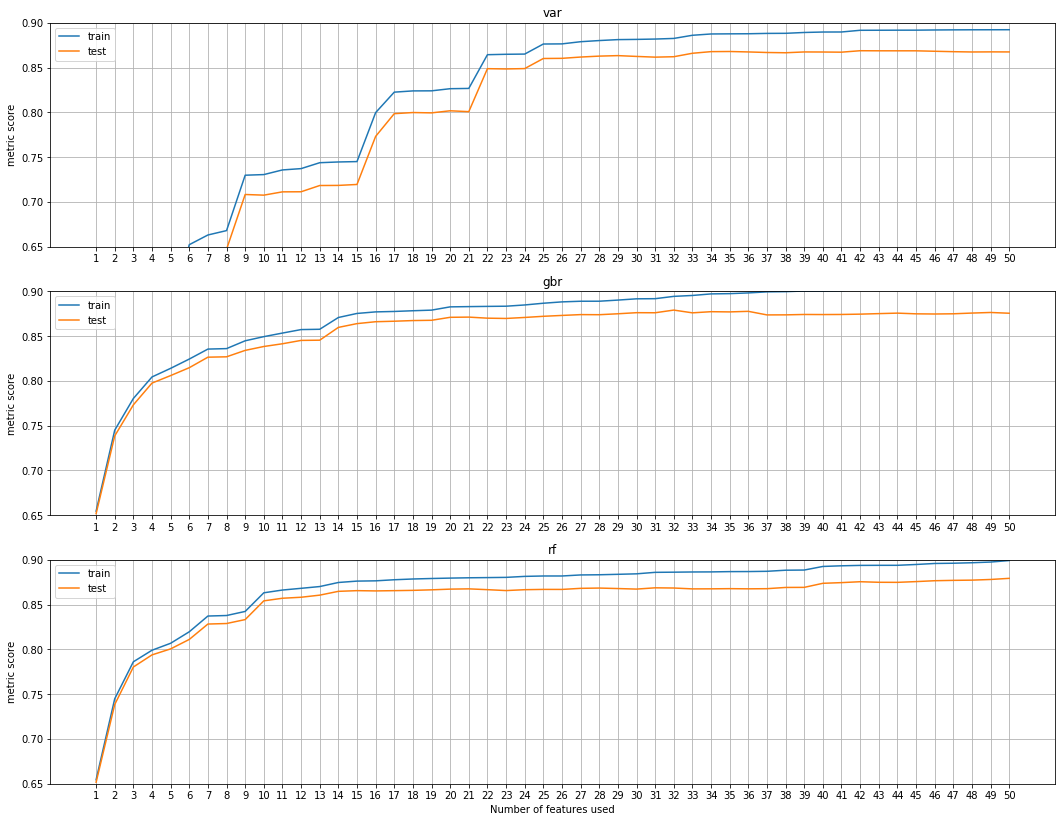

In [52]:
fig, axes = plt.subplots(3,1, figsize=(18,14))

for ax, name in zip([0,1,2], ['var', 'gbr', 'rf']):
    axes[ax].plot(range(1, max_num_features), lasso_train_scores[name], label='train')
    axes[ax].plot(range(1, max_num_features), lasso_test_scores[name], label='test')
    axes[ax].legend()
    axes[ax].set_ylabel('metric score')
    axes[ax].title.set_text(name)
    axes[ax].set_xticks(range(1, max_num_features))
    axes[ax].grid()
    axes[ax].set_ylim(.65,.9)
    
plt.xlabel('Number of features used');

In [53]:
cross_validate(pipeline_lasso, data, target_log, cv=3, scoring='r2', return_train_score=True)
print('Compare to scores on full data')
print('train score,' , scores['train_score'].mean())
print('test score,' , scores['test_score'].mean())

Compare to scores on full data
train score, 0.8993519296670249
test score, 0.8794675415810089


#### Ridge

In [54]:
max_num_features = 51

In [55]:
ridge_train_scores = pd.DataFrame()
ridge_test_scores = pd.DataFrame()

In [56]:
for name, feature_df in zip(['var', 'gbr', 'rf'], [feature_df_var, feature_df_gbr, feature_df_rf]):
    ridge_r_squared_train = []
    ridge_r_squared_test = []
    
    for num_features in range(1,max_num_features):
        features = list(feature_df.iloc[:num_features, 0].values)
        data_partial = data.loc[:, features]
        
        pipeline_ridge = Pipeline([('scaler', StandardScaler()), ('estimator', Ridge(alpha=5))])
        scores = cross_validate(pipeline_ridge, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)
        
        ridge_r_squared_train.append(scores['train_score'].mean())
        ridge_r_squared_test.append(scores['test_score'].mean())
    
    ridge_train_scores[name] = ridge_r_squared_train
    ridge_test_scores[name] = ridge_r_squared_test

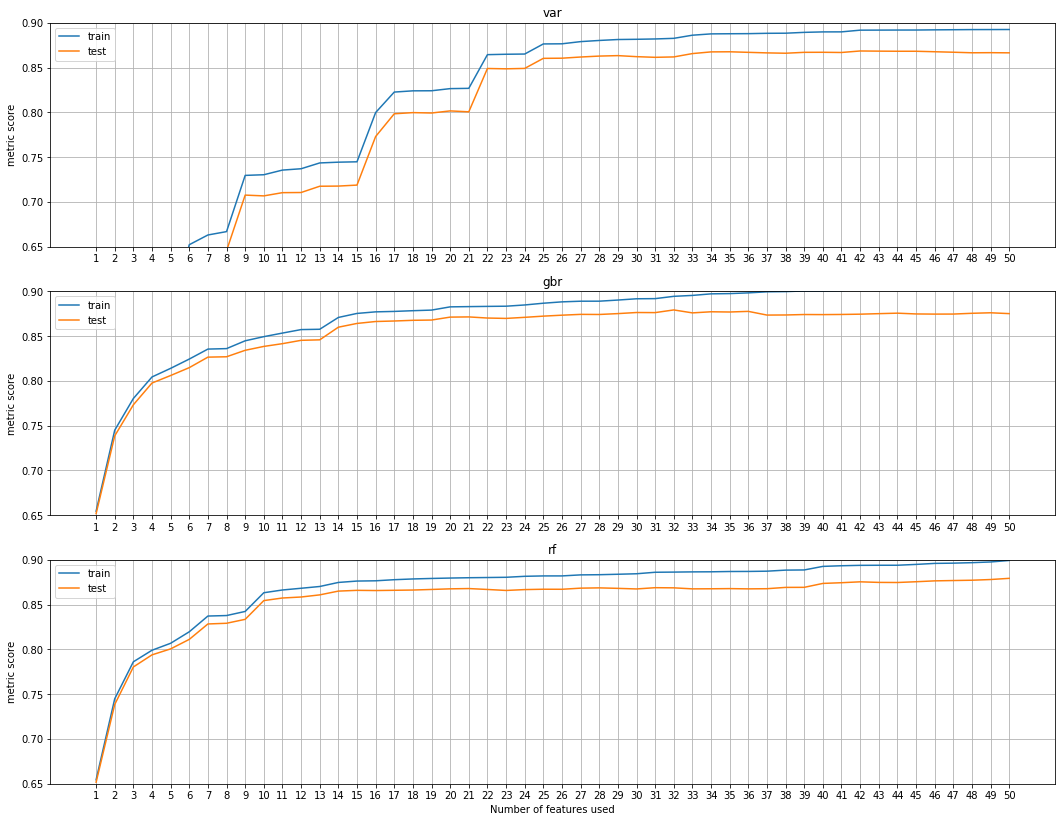

In [57]:
fig, axes = plt.subplots(3,1, figsize=(18,14))

for ax, name in zip([0,1,2], ['var', 'gbr', 'rf']):
    axes[ax].plot(range(1, max_num_features), ridge_train_scores[name], label='train')
    axes[ax].plot(range(1, max_num_features), ridge_test_scores[name], label='test')
    axes[ax].legend()
    axes[ax].set_ylabel('metric score')
    axes[ax].title.set_text(name)
    axes[ax].set_xticks(range(1, max_num_features))
    axes[ax].grid()
    axes[ax].set_ylim(.65,.9)
    
plt.xlabel('Number of features used');

In [58]:
cross_validate(pipeline_ridge, data, target_log, cv=3, scoring='r2', return_train_score=True)
print('Compare to scores on full data')
print('train score,' , scores['train_score'].mean())
print('test score,' , scores['test_score'].mean())

Compare to scores on full data
train score, 0.8994409537529746
test score, 0.8794725008967422


#### Random Forest

In [59]:
max_num_features = 31

In [60]:
rf_train_scores = pd.DataFrame()
rf_test_scores = pd.DataFrame()

In [61]:
for name, feature_df in zip(['var', 'gbr', 'rf'], [feature_df_var, feature_df_gbr, feature_df_rf]):
    rf_r_squared_train = []
    rf_r_squared_test = []
    
    for num_features in range(1,max_num_features):
        features = list(feature_df.iloc[:num_features, 0].values)
        data_partial = data.loc[:, features]
        
        rf = RandomForestRegressor(**best_params_rf)
        scores = cross_validate(rf, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)
        
        rf_r_squared_train.append(scores['train_score'].mean())
        rf_r_squared_test.append(scores['test_score'].mean())
    
    rf_train_scores[name] = rf_r_squared_train
    rf_test_scores[name] = rf_r_squared_test

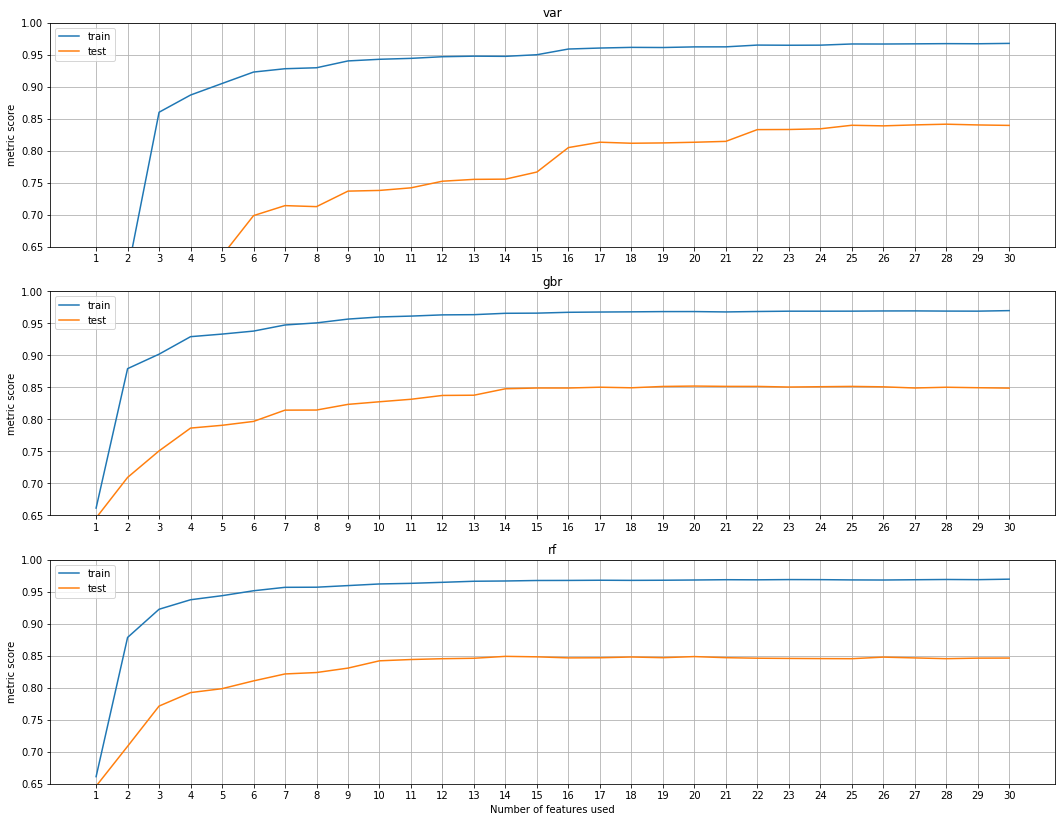

In [62]:
fig, axes = plt.subplots(3,1, figsize=(18,14))

for ax, name in zip([0,1,2], ['var', 'gbr', 'rf']):
    axes[ax].plot(range(1, max_num_features), rf_train_scores[name], label='train')
    axes[ax].plot(range(1, max_num_features), rf_test_scores[name], label='test')
    axes[ax].legend()
    axes[ax].set_ylabel('metric score')
    axes[ax].title.set_text(name)
    axes[ax].set_xticks(range(1, max_num_features))
    axes[ax].grid()
    axes[ax].set_ylim(.65,1)
    
plt.xlabel('Number of features used');

In [63]:
cross_validate(rf, data, target_log, cv=3, scoring='r2', return_train_score=True)
print('Compare to scores on full data')
print('train score,' , scores['train_score'].mean())
print('test score,' , scores['test_score'].mean())

Compare to scores on full data
train score, 0.9699715689393379
test score, 0.8466011766429142


### Comparing features

#### set of top 10

top_10 is the set of all features that falls into the top 10 features of any of the feature rating technique

In [64]:
top_10 = top_n_features(10).index

In [65]:
data_partial = data.loc[:, top_10]

In [66]:
pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('estimator', Lasso(alpha=.0005))])
scores_lasso = cross_validate(pipeline_lasso, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)

pipeline_ridge = Pipeline([('scaler', StandardScaler()), ('estimator', Ridge(alpha=5))])
scores_ridge = cross_validate(pipeline_ridge, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)
    
rf = RandomForestRegressor(**best_params_rf)
scores_rf = cross_validate(rf, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)

for model, scores in zip(['lasso', 'ridge', 'rf'], [scores_lasso, scores_ridge, scores_rf]):
        print(model, 'train: ', scores['train_score'].mean())
        print(model, 'test: ', scores['test_score'].mean())

lasso train:  0.871244199210782
lasso test:  0.8567301777984833
ridge train:  0.8713251437866788
ridge test:  0.8567752077757621
rf train:  0.9654101232166163
rf test:  0.8425923248981565


In [67]:
len(top_10)

16

In [68]:
top_10

Index(['GrLivArea', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1',
       'OverallQual', '2ndFlrSF', 'LotArea', 'YearBuilt', 'BsmtUnfSF',
       'MasVnrArea', 'BsmtQual', 'OverallCond', 'MiscVal', 'KitchenQual',
       'GarageFinish'],
      dtype='object')

##### For random forest these are enough to achieve optimum results.

#### set of top 20

In [69]:
top_20 = top_n_features(20).index

top_20 is the set of all features that falls into the top 20 features of any of the feature rating technique

In [70]:
data_partial = data.loc[:, top_20]

In [71]:
pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('estimator', Lasso(alpha=.0005))])
scores_lasso = cross_validate(pipeline_lasso, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)

pipeline_ridge = Pipeline([('scaler', StandardScaler()), ('estimator', Ridge(alpha=5))])
scores_ridge = cross_validate(pipeline_ridge, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)
    
rf = RandomForestRegressor(**best_params_rf)
scores_rf = cross_validate(rf, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)

for model, scores in zip(['lasso', 'ridge', 'rf'], [scores_lasso, scores_ridge, scores_rf]):
        print(model, 'train: ', scores['train_score'].mean())
        print(model, 'test: ', scores['test_score'].mean())

lasso train:  0.8883249289333937
lasso test:  0.8725197826068425
ridge train:  0.8883537445420888
ridge test:  0.8725407623847863
rf train:  0.9696445518694254
rf test:  0.8475970490065516


In [72]:
len(top_20)

29

In [229]:
top_20

Index(['BsmtFinType1', 'LotArea', 'YearRemodAdd', 'GrLivArea', '2ndFlrSF',
       '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1',
       'OpenPorchSF', 'Fireplaces', 'MSZoning', 'LotFrontage', 'OverallQual',
       'OverallCond', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'GarageFinish',
       'Neighborhood_Crawfor', 'EnclosedPorch', 'WoodDeckSF', 'MSSubClass',
       'GarageYrBlt', 'ScreenPorch', 'MiscVal', 'KitchenQual', 'MasVnrArea'],
      dtype='object')

#### set of top 30

In [73]:
top_30 = top_n_features(30).index

top_30 is the set of all features that falls into the top 30 features of any of the feature rating technique

In [74]:
data_partial = data.loc[:, top_30]

In [75]:
pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('estimator', Lasso(alpha=.0005))])
scores_lasso = cross_validate(pipeline_lasso, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)

pipeline_ridge = Pipeline([('scaler', StandardScaler()), ('estimator', Ridge(alpha=5))])
scores_ridge = cross_validate(pipeline_ridge, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)
    
rf = RandomForestRegressor(**best_params_rf)
scores_rf = cross_validate(rf, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)

for model, scores in zip(['lasso', 'ridge', 'rf'], [scores_lasso, scores_ridge, scores_rf]):
        print(model, 'train: ', scores['train_score'].mean())
        print(model, 'test: ', scores['test_score'].mean())

lasso train:  0.8952290998832763
lasso test:  0.8742747431969891
ridge train:  0.8953173688785414
ridge test:  0.8740000600203869
rf train:  0.9690140314215513
rf test:  0.8472207320893093


In [76]:
len(top_30)

41

#### set of top 40

In [77]:
top_40 = top_n_features(40).index

top_40 is the set of all features that falls into the top 40 features of any of the feature rating technique

In [78]:
data_partial = data.loc[:, top_40]

In [79]:
pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('estimator', Lasso(alpha=.0005))])
scores_lasso = cross_validate(pipeline_lasso, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)

pipeline_ridge = Pipeline([('scaler', StandardScaler()), ('estimator', Ridge(alpha=5))])
scores_ridge = cross_validate(pipeline_ridge, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)
    
rf = RandomForestRegressor(**best_params_rf)
scores_rf = cross_validate(rf, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)

for model, scores in zip(['lasso', 'ridge', 'rf'], [scores_lasso, scores_ridge, scores_rf]):
        print(model, 'train: ', scores['train_score'].mean())
        print(model, 'test: ', scores['test_score'].mean())

lasso train:  0.9064575049110584
lasso test:  0.8767527469486879
ridge train:  0.9065599730719759
ridge test:  0.8761794627429564
rf train:  0.9695502443543415
rf test:  0.8473531149105272


In [80]:
len(top_40)

55

#### set of top 50

In [81]:
top_50 = top_n_features(50).index

top_50 is the set of all features that falls into the top 50 features of any of the feature rating technique

In [82]:
data_partial = data.loc[:, top_50]

In [83]:
pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('estimator', Lasso(alpha=.0005))])
scores_lasso = cross_validate(pipeline_lasso, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)

pipeline_ridge = Pipeline([('scaler', StandardScaler()), ('estimator', Ridge(alpha=5))])
scores_ridge = cross_validate(pipeline_ridge, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)
    
rf = RandomForestRegressor(**best_params_rf)
scores_rf = cross_validate(rf, data_partial, target_log, cv=3, scoring='r2', return_train_score=True)

for model, scores in zip(['lasso', 'ridge', 'rf'], [scores_lasso, scores_ridge, scores_rf]):
        print(model, 'train: ', scores['train_score'].mean())
        print(model, 'test: ', scores['test_score'].mean())

lasso train:  0.9122459508943782
lasso test:  0.8767812824323565
ridge train:  0.912485723907594
ridge test:  0.8755488956186994
rf train:  0.9698527056701861
rf test:  0.8474623891516327


In [84]:
len(top_50)

71

### Classification models

In [85]:
best_params_rfc={'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 100}

In [86]:
max_num_features = 31

In [87]:
rfc_train_scores = pd.DataFrame()
rfc_test_scores = pd.DataFrame()

In [88]:
for name, feature_df in zip(['var', 'gbr', 'rf'], [feature_df_var, feature_df_gbr, feature_df_rf]):
    rfc_r_squared_train = []
    rfc_r_squared_test = []
    
    for num_features in range(1,max_num_features):
        features = list(feature_df.iloc[:num_features, 0].values)
        data_partial = data.loc[:, features]
        
        rfc = RandomForestClassifier(**best_params_rfc)
        scores_rfc = cross_validate(rfc, data_partial, target_binned, cv=3,
                                scoring='f1_macro', return_train_score=True)
        
        rfc_r_squared_train.append(scores_rfc['train_score'].mean())
        rfc_r_squared_test.append(scores_rfc['test_score'].mean())
    
    rfc_train_scores[name] = rfc_r_squared_train
    rfc_test_scores[name] = rfc_r_squared_test

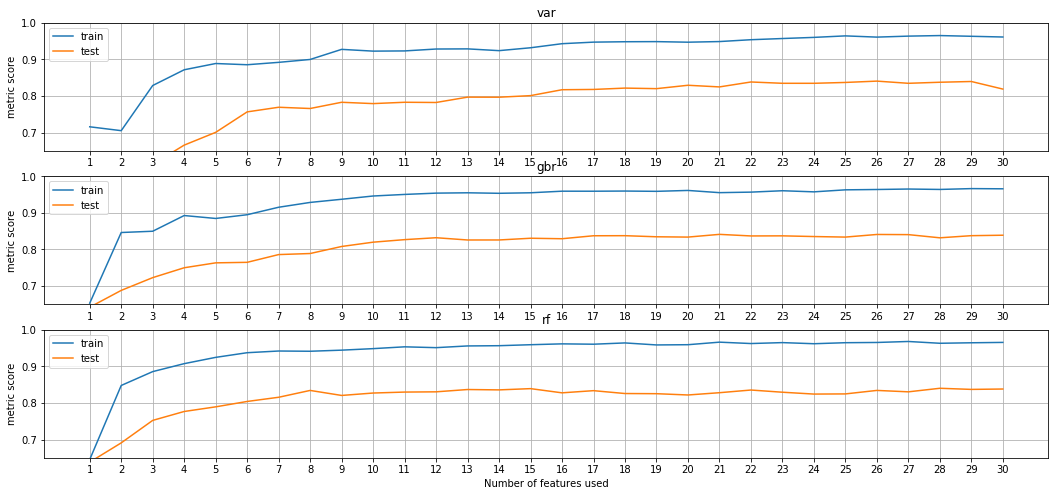

In [89]:
fig, axes = plt.subplots(3,1, figsize=(18,8))

for ax, name in zip([0,1,2], ['var', 'gbr', 'rf']):
    axes[ax].plot(range(1, max_num_features), rfc_train_scores[name], label='train')
    axes[ax].plot(range(1, max_num_features), rfc_test_scores[name], label='test')
    axes[ax].legend()
    axes[ax].set_ylabel('metric score')
    axes[ax].title.set_text(name)
    axes[ax].set_xticks(range(1, max_num_features))
    axes[ax].grid()
    axes[ax].set_ylim(.65,1)
    
plt.xlabel('Number of features used');

#### set of top 10

In [90]:
top_10 = top_n_features(10).index

top_10 is the set of all features that falls into the top 10 features of any of the feature rating technique

In [91]:
data_partial = data.loc[:, top_10]

In [92]:
rfc = RandomForestClassifier(**best_params_rfc)
scores = cross_validate(rfc, data_partial, target_binned, cv=3, scoring='f1_macro', return_train_score=True)

print(model, 'train: ', scores['train_score'].mean())
print(model, 'test: ', scores['test_score'].mean())

rf train:  0.9550721000754433
rf test:  0.832220072871041


In [93]:
len(top_10)

16

#### set of top 20

In [94]:
top_20 = top_n_features(20).index

top_20 is the set of all features that falls into the top 20 features of any of the feature rating technique

In [95]:
data_partial = data.loc[:, top_20]

In [96]:
rfc = RandomForestClassifier(**best_params_rfc)
scores = cross_validate(rfc, data_partial, target_binned, cv=3, scoring='f1_macro', return_train_score=True)

print(model, 'train: ', scores['train_score'].mean())
print(model, 'test: ', scores['test_score'].mean())

rf train:  0.9648142891981607
rf test:  0.83885799219013


#### Scores barely improve from here so we will use the features in top_20

In [97]:
len(top_20)

29

#### set of top 30

In [98]:
top_30 = top_n_features(30).index

top_30 is the set of all features that falls into the top 30 features of any of the feature rating technique

In [99]:
data_partial = data.loc[:, top_30]

In [100]:
rfc = RandomForestClassifier(**best_params_rfc)
scores = cross_validate(rfc, data_partial, target_binned, cv=3, scoring='f1_macro', return_train_score=True)

print(model, 'train: ', scores['train_score'].mean())
print(model, 'test: ', scores['test_score'].mean())

rf train:  0.9648714110214773
rf test:  0.8308747024435403


In [101]:
len(top_30)

41

#### set of top 5

In [102]:
top_5 = top_n_features(5).index

top_5 is the set of all features that falls into the top 5 features of any of the feature rating technique

In [103]:
data_partial = data.loc[:, feature_df_rf.feature[:10]]

In [104]:
rfc = RandomForestClassifier(**best_params_rfc)
scores = cross_validate(rfc, data_partial, target_binned, cv=3, scoring='f1_macro', return_train_score=True)

print(model, 'train: ', scores['train_score'].mean())
print(model, 'test: ', scores['test_score'].mean())

rf train:  0.9561865968690744
rf test:  0.8319606611081469


In [105]:
len(top_5)

11

In [106]:
top_5

Index(['GrLivArea', 'OverallQual', 'GarageArea', 'BsmtUnfSF', 'KitchenQual',
       'MiscVal', '2ndFlrSF', 'LotArea', 'GarageFinish', '1stFlrSF',
       'TotalBsmtSF'],
      dtype='object')

# Final Testing!!


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 888 to 682
Columns: 156 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(153)
memory usage: 1.2 MB


In [130]:
len(target), target[:5]

(1021, 888     268000
 1336    135000
 608     359100
 733     131400
 858     152000
 Name: SalePrice, dtype: int64)

In [131]:
len(target_log), target_log[:5]

(1021, 888     12.498742
 1336    11.813030
 608     12.791356
 733     11.786001
 858     11.931636
 Name: SalePrice, dtype: float64)

In [132]:
len(target_binned), target_binned[:5]

(1021, [2, 1, 2, 1, 1])

In [133]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 625 to 1162
Columns: 158 entries, Unnamed: 0 to SaleCondition_Partial
dtypes: float64(3), int64(155)
memory usage: 544.1 KB


In [135]:
len(target_test), target_test[:5]

(438, 625     160000
 527     446261
 921     145900
 1104    106000
 905     128000
 Name: SalePrice, dtype: int64)

In [136]:
target_test_log = np.log(target_test)

In [137]:
len(target_test_log), target_test_log[:5]

(438, 625     11.982929
 527     13.008659
 921     11.890677
 1104    11.571194
 905     11.759786
 Name: SalePrice, dtype: float64)

In [138]:
target_test_binned = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in target_test.values]

In [139]:
len(target_test_binned), target_test_binned[:5]

(438, [1, 2, 1, 0, 1])

### OK ready to go...

### Random Forest Classifier

In [164]:
best_params_rfc={'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 100}

In [189]:
param_grid = dict(max_depth = [15,20,25],
                  min_samples_leaf = [1, 2, 3],
                  min_samples_split = [6,8,10],
                  n_estimators = [50,100,150,300])

In [165]:
rfc = RandomForestClassifier(**best_params_rfc)

In [191]:
gridsearch = GridSearchCV(estimator = rfc, param_grid = param_grid, cv=3)

In [192]:
#gridsearch.fit(data.loc[:,rfc_features], target_binned)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=2,
                                              min_samples_split=8,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='war

In [216]:
best_params_rfc = gridsearch.best_params_

{'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
best_params_rfc = {'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [211]:
rfc = RandomForestClassifier(**best_params_rfc)

In [212]:
rfc_features = ['GrLivArea', 'OverallQual', 'GarageArea', 'BsmtUnfSF', 'KitchenQual',
               'MiscVal', '2ndFlrSF', 'LotArea', 'GarageFinish', '1stFlrSF',
               'TotalBsmtSF']

In [213]:
rfc.fit(data.loc[:,rfc_features], target_binned)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [214]:
rfc.score(data.loc[:,rfc_features], target_binned)

0.9451518119490695

In [215]:
rfc.score(data_test.loc[:,rfc_features], target_test_binned)

0.821917808219178

### Random Forest Regressor

In [219]:
best_params_rf = {'max_depth': 35,
                  'min_samples_leaf': 2,
                  'min_samples_split': 4,
                  'n_estimators': 250}

In [220]:
param_grid = dict(max_depth = [30,35,40],
                  min_samples_leaf = [1, 2, 3],
                  min_samples_split = [2,4,6],
                  n_estimators = [200, 250, 300, 350])

In [223]:
rf = RandomForestRegressor(**best_params_rf)

In [224]:
gridsearch = GridSearchCV(estimator = rf, param_grid = param_grid, cv=3)

In [225]:
#gridsearch.fit(data.loc[:,rf_features], target_log)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=35, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=4,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=250, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [30, 35, 40],
                         'min_samples_leaf': [1, 2, 3]

In [233]:
#best_params_rf = gridsearch.best_params_

In [234]:
best_params_rf = {'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [235]:
rf = RandomForestRegressor(**best_params_rf)

In [236]:
rf_features = ['GrLivArea', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1',
               'OverallQual', '2ndFlrSF', 'LotArea', 'YearBuilt', 'BsmtUnfSF',
               'MasVnrArea', 'BsmtQual', 'OverallCond', 'MiscVal', 'KitchenQual',
               'GarageFinish']

In [237]:
rf.fit(data.loc[:,rf_features], target_log)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [238]:
rf.score(data.loc[:,rf_features], target_log)

0.9796615525661733

In [239]:
rf.score(data_test.loc[:,rf_features], target_test_log)

0.8733047082705951

### Lasso

In [247]:
lr_features = ['BsmtFinType1', 'LotArea', 'YearRemodAdd', 'GrLivArea', '2ndFlrSF',
       '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1',
       'OpenPorchSF', 'Fireplaces', 'MSZoning', 'LotFrontage', 'OverallQual',
       'OverallCond', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'GarageFinish',
       'Neighborhood_Crawfor', 'EnclosedPorch', 'WoodDeckSF', 'MSSubClass',
       'GarageYrBlt', 'ScreenPorch', 'MiscVal', 'KitchenQual', 'MasVnrArea']

In [252]:
param_grid = dict(alpha=[.0005, .001, .005, .01, .05, .1, 1])

In [262]:
gridsearch = GridSearchCV(estimator = Lasso(normalize=True), param_grid = param_grid, cv=3)

In [263]:
gridsearch.fit(data.loc[:,lr_features], target_log)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [264]:
#gridsearch.best_params_

{'alpha': 0.0005}

In [269]:
best_params_lasso = {'alpha': 0.0005}

In [274]:
pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('estimator', Lasso(alpha=.0005))])

In [275]:
pipeline_lasso.fit(data.loc[:,lr_features], target_log)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [276]:
pipeline_lasso.score(data.loc[:,lr_features], target_log)

0.8860208850346677

In [277]:
pipeline_lasso.score(data_test.loc[:,lr_features], target_test_log)

0.8179565986229254

### Ridge

In [288]:
lr_features = ['BsmtFinType1', 'LotArea', 'YearRemodAdd', 'GrLivArea', '2ndFlrSF',
       '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1',
       'OpenPorchSF', 'Fireplaces', 'MSZoning', 'LotFrontage', 'OverallQual',
       'OverallCond', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'GarageFinish',
       'Neighborhood_Crawfor', 'EnclosedPorch', 'WoodDeckSF', 'MSSubClass',
       'GarageYrBlt', 'ScreenPorch', 'MiscVal', 'KitchenQual', 'MasVnrArea']

In [297]:
param_grid = dict(alpha=[.01, .05, .1, .5, 1, 2])

In [298]:
gridsearch = GridSearchCV(estimator = Ridge(normalize=True), param_grid = param_grid, cv=3)

In [299]:
gridsearch.fit(data.loc[:,lr_features], target_log)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [300]:
gridsearch.best_params_

{'alpha': 0.05}

In [302]:
best_params_ridge = {'alpha': 0.05}

In [303]:
pipeline_ridge = Pipeline([('scaler', StandardScaler()), ('estimator', Ridge(alpha=.05))])

In [304]:
pipeline_ridge.fit(data.loc[:,lr_features], target_log)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 Ridge(alpha=0.05, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [305]:
pipeline_ridge.score(data.loc[:,lr_features], target_log)

0.8861138595818668

In [306]:
pipeline_ridge.score(data_test.loc[:,lr_features], target_test_log)

0.8175056705937834